# Logistic Regression 

__Sigmoid Function__
\begin{equation}
\begin{aligned}
z = \sum_{i=1}^{n} w_i\cdot x_i + b  \\
z = W \cdot X + b \\
h(z) = \frac{1}{1 + e^{-z}}
\end{aligned}
\end{equation}


__Cost Function__
\begin{equation}
\begin{aligned}
 J(z) = -\frac{1}{N} \sum_{i=1}^{N} y_i log(h_{z}(x_i)) + (1 - y_i)log\big(1 - h_{z}(x_i)\big)\\
 J(z) = -\frac{1}{N} \sum_{i=1}^{N} y_i log(h(w.x^i + b)) + (1 - y_i)log\big(1 - h(w.x^i + b)\big)
\end{aligned}
\end{equation}


__Gradient Descent__
\begin{equation}
\begin{aligned}
\frac{\partial J(z)}{\partial w_j} = \frac{1}{N} \sum_{i=1}^{N}  \big[h(w.x^i + b) - y^i \big ] x^{i}_j \\
\frac{\partial J(z)}{\partial b_j} = \frac{1}{N} \sum_{i=1}^{N}  \big[h(w.x^i + b) - y^i \big ] 
\end{aligned}
\end{equation}

__update parameters__
\begin{equation}
\begin{aligned}
w_j = w_i - lr \frac{\partial J(z)}{\partial w_j} \\
b_j = b_i - lr \frac{\partial J(z)}{\partial b_j} 
\end{aligned}
\end{equation}

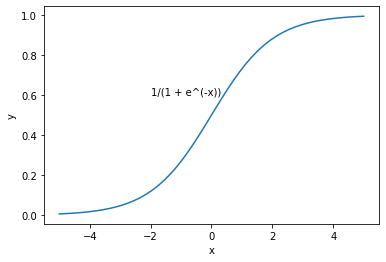

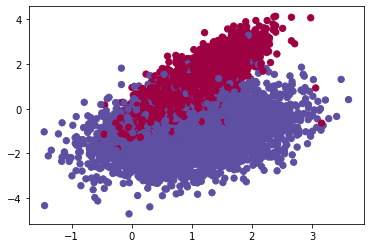

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 


x1 = np.linspace(-5,5)
y1 =  1 / (1 + np.exp(-x1 ))

plt.plot(x1,y1)
plt.xlabel('x')
plt.ylabel('y')
plt.annotate(text =( '1/(1 + e^(-x))'), xy = (-2,0.6))
plt.show()



from sklearn.datasets import make_classification
x,y = make_classification(n_samples=10000, n_features=2, n_redundant=0, n_informative=2,random_state=1, n_clusters_per_class=1)
y = y.reshape((x.shape[0],1))
plt.scatter(x[:,0], x[:,1],c=y.ravel(), s=40, cmap=plt.cm.Spectral)
plt.show() 




In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd 

df = pd.read_csv('data/ion.csv')
df.drop(columns = ['Unnamed: 0', 'V1', 'V2'], inplace = True)
df.Class = np.where(df.Class == 'good', 1,0)


X = df.drop(columns=['Class']).values
y = df.Class.values

# let's apply pca since we have large number of features vector
from sklearn.decomposition import  PCA
pca = PCA(n_components=10)
X = pca.fit_transform(X)



x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train = y_train.reshape((y_train.shape[0], 1))
y_test  = y_test.reshape((y_test.shape[0], 1))




In [3]:
class BinaryRegression():

    def __init__(self, epochs = 10000, lr = 0.001):

        self.w = None
        self.b = None 

        self.lr = lr
        self.epochs = epochs  


    # Method 
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))


    # Method 
    def CostFunction(self, y, y_pred):
        return np.mean((-y*np.log(y_pred)) - (1-y)*np.log(1 - y_pred))


    # Method 
    def fit(self, x, y):

        n_samples, n_features = x.shape

        # w = np.zeros(n_class, n_features) 
        self.w = np.zeros((1, n_features))
        self.b = 0

        losses = []


        for epoch in range(self.epochs):

            z = np.dot(x, self.w.T) + self.b

            # calling the Function sigmoid function
            y_pred = self.sigmoid(z)


            # loss 
            loss = self.CostFunction(y, y_pred)

            # Appending the loss
            losses.append(loss)

            # Gradient
            dw = (1/n_samples)*np.dot((y_pred - y ).T, x)
            db = (1/n_samples)*np.sum(y_pred - y )


            # Gradient Descent
            self.w = self.w  - self.lr*dw
            self.b = self.b - self.lr *db 


            if epoch%1000==0:
                print(f'Epoch: {epoch} loss:{loss}')

        return losses 



    def predict(self, x, y):
        z =  np.dot(x, self.w.T) + self.b
        y_pred =  self.sigmoid(z)
        return (y_pred.round() == y).mean()






Epoch: 0 loss:0.6931471805599454
Epoch: 1000 loss:0.4166168295012706
Epoch: 2000 loss:0.3814104496240691
Epoch: 3000 loss:0.368607351266047
Epoch: 4000 loss:0.36251841157246656
Epoch: 5000 loss:0.3592448370638141
Epoch: 6000 loss:0.3573539613891387
Epoch: 7000 loss:0.3562087895384715
Epoch: 8000 loss:0.35549165000528193
Epoch: 9000 loss:0.35503135033083755


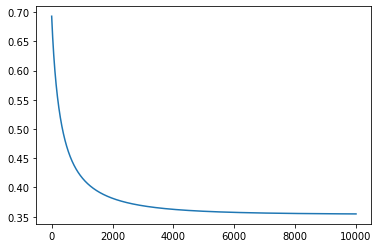

In [4]:
binary = BinaryRegression(epochs =10000, lr=0.01)
loss = binary.fit(x_train, y_train )


plt.plot(range(10000), loss)
plt.show()

In [5]:
binary.predict(x_test,y_test)

0.8732394366197183